In [2]:
# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob

In [30]:
filenames = glob('DataSujetos/*.csv')
df = pd.read_csv(filenames[0], header=-1)
n = df.shape[0]
df -= np.diag(np.ones(n))

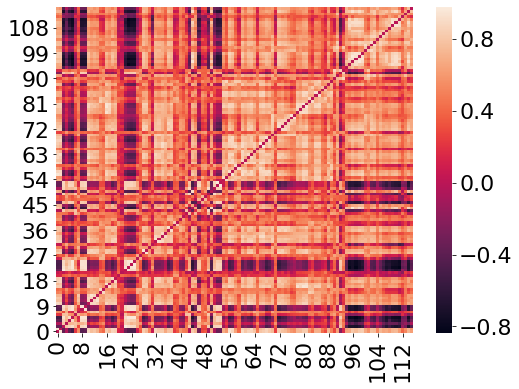

In [31]:
sns.heatmap(df);
plt.xlim(0,n)
plt.ylim(0,n);

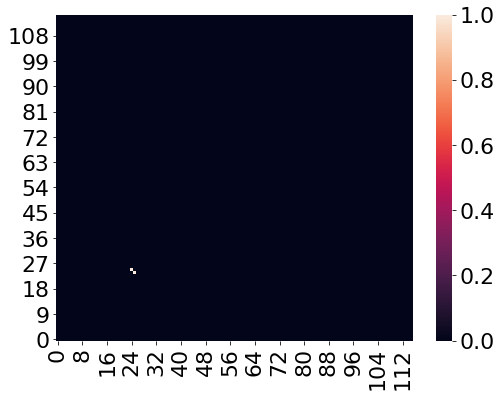

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 1
Average degree:   0.0172


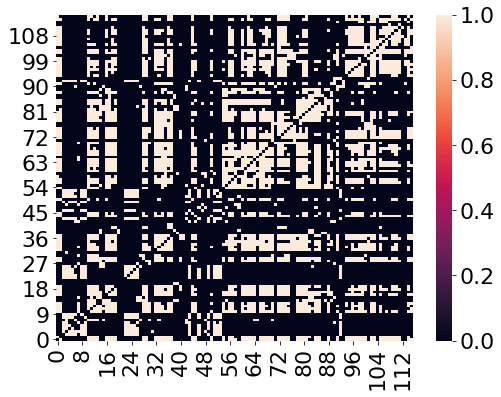

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 2001
Average degree:  34.5000


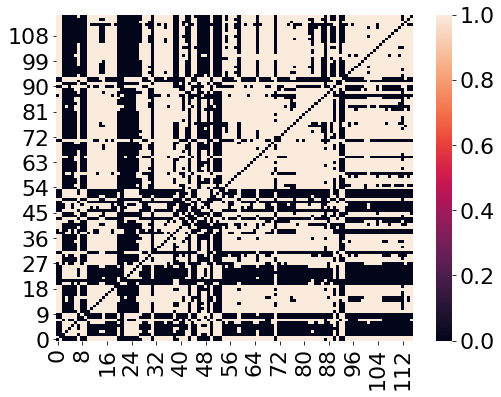

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 4001
Average degree:  68.9828


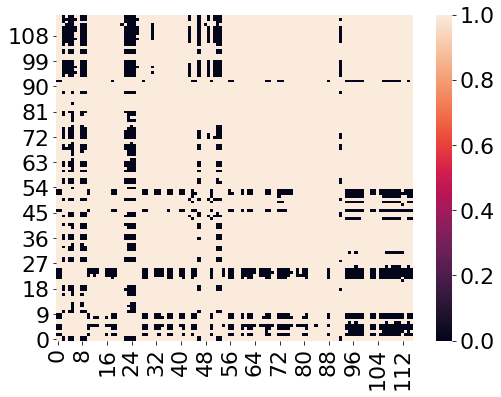

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 6059
Average degree: 104.4655


In [32]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
for d in np.arange(0,n*n-1,4000):
    u = sort_corrs[d]
    plt.figure()
    sns.heatmap(df>=u)
    plt.xlim(0,n)
    plt.ylim(0,n);
    plt.show()
    
    G = nx.from_pandas_adjacency(df>=u)
    print(nx.info(G))

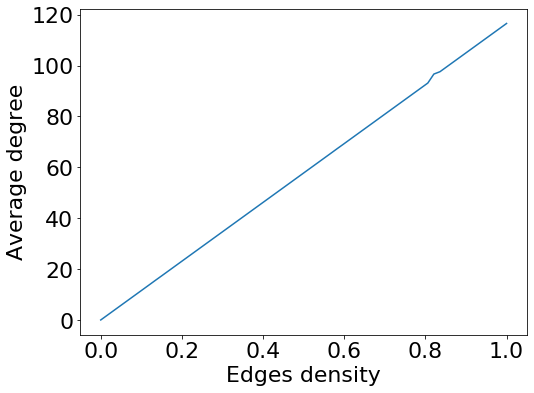

In [39]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
avg_degree = []
ds = np.arange(0,n*n-1,200)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    avg_degree_ = np.mean([v for n,v in G.degree])
    avg_degree.append(avg_degree_)
    
plt.plot(ds/ds.max(),avg_degree)
plt.xlabel('Edges density')
plt.ylabel('Average degree');